In [1]:
import sys, os
#this is a comment
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir) + "/src/"
sys.path.insert(0, parentdir) 

from modeling import *
from analysis import *
from plots import *
from utils import colormaps
from pymer4.models import Lmer

%load_ext autoreload
%autoreload 2

## Import Fitted Data

In [2]:
# R for reliability, V for volatility, T for controllability
type_ = "R"

colormap_ = {"R": colormaps["arctic"], "T": colormaps["berry"], "V": colormaps["grass"]}
colormap = colormap_[type_]

# path/to/final_fit/folder/
folder = "final_fit"

# which filter functions to compare to
filter_fns = [
    ["depth", filter_depth],
    ["rank", filter_rank],
    ["value", filter_value],
]

# exclude EV from volatility condition
if type_ == "V": 
    value_fns = [
        ["path", value_path], 
        ["max", value_max],
        ["sum", value_sum]
    ]
else: 
    value_fns = [
        ["path", value_path], 
        ["EV", value_EV],
        ["max", value_max],
        ["sum", value_sum]
    ]

# load data into analyzer with baseline filter_depth.value_path
a = Analyzer(f"{folder}.filter_depth.value_path", filter_fns, value_fns, type_, colors = colormap, folders = [folder])

../data/final_fit/R_value_path.filter_depth


100%|██████████| 100/100 [00:00<00:00, 16978.24it/s]


../data/final_fit/R_value_EV.filter_depth


100%|██████████| 100/100 [00:00<00:00, 14995.19it/s]


../data/final_fit/R_value_max.filter_depth


100%|██████████| 100/100 [00:00<00:00, 16074.44it/s]


../data/final_fit/R_value_sum.filter_depth


100%|██████████| 100/100 [00:00<00:00, 16168.01it/s]


../data/final_fit/R_value_path.filter_rank


100%|██████████| 100/100 [00:00<00:00, 10991.36it/s]


../data/final_fit/R_value_EV.filter_rank


100%|██████████| 100/100 [00:00<00:00, 18254.36it/s]


../data/final_fit/R_value_max.filter_rank


100%|██████████| 100/100 [00:00<00:00, 16795.35it/s]


../data/final_fit/R_value_sum.filter_rank


100%|██████████| 100/100 [00:00<00:00, 12332.20it/s]


../data/final_fit/R_value_path.filter_value


100%|██████████| 100/100 [00:00<00:00, 17361.25it/s]


../data/final_fit/R_value_EV.filter_value


100%|██████████| 100/100 [00:00<00:00, 15024.19it/s]


../data/final_fit/R_value_max.filter_value


100%|██████████| 100/100 [00:00<00:00, 17259.09it/s]


../data/final_fit/R_value_sum.filter_value


100%|██████████| 100/100 [00:00<00:00, 16236.85it/s]


## Empirical Plots

### Figure 2 (A - C): Label Difference vs P(Choice = Left)

100%|██████████| 100/100 [00:01<00:00, 79.31it/s]


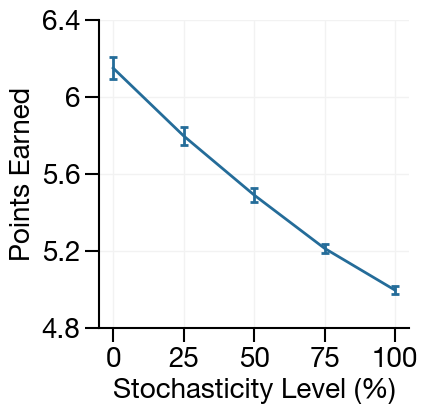

In [3]:
a.plot_checking_condition(trialwise_rewards, show_model = False)
plt.ylabel("Points Earned"); plt.xlabel("Stochasticity Level (%)"); plt.xticks(np.array(get_conditions(type_)) * 100);
plt.yticks([4.8, 5.2, 5.6, 6, 6.4])
plt.gca().set_yticklabels([strsimplify(y) for y in plt.gca().get_yticks()]);
plt.gca().set_xticklabels([strsimplify(x) for x in plt.gca().get_xticks()]);

### Figure 2 (D - F): Stochasticity Level vs Points Earned

100%|██████████| 100/100 [00:00<00:00, 108.86it/s]


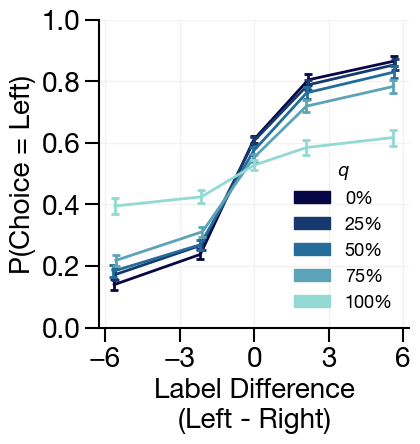

In [4]:
a.plot_checking(trialwise_greedydiff, trialwise_chooseleft, n_bins = 5, show_model = False)
plt.xlabel("Label Difference\n(Left - Right)"); plt.ylabel("P(Choice = Left)")
plt.ylim([0, 1])
plt.xticks([-6, -3, 0, 3, 6]);

### Figure 2 (G - I): Reaction Time Plots

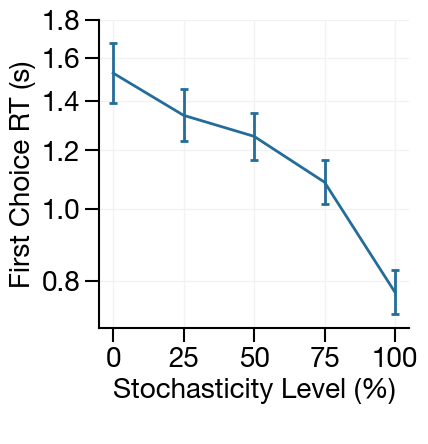

In [5]:
df_rt = a.plot_stochasticity_vs_rt()
plt.gca().set_xticklabels([strsimplify(x) for x in plt.gca().get_xticks()]);

## Model Plots

### Figure 4: Model Comparison Plots

N bootstrap 1000000.0


100%|██████████| 12/12 [00:08<00:00,  1.35it/s]


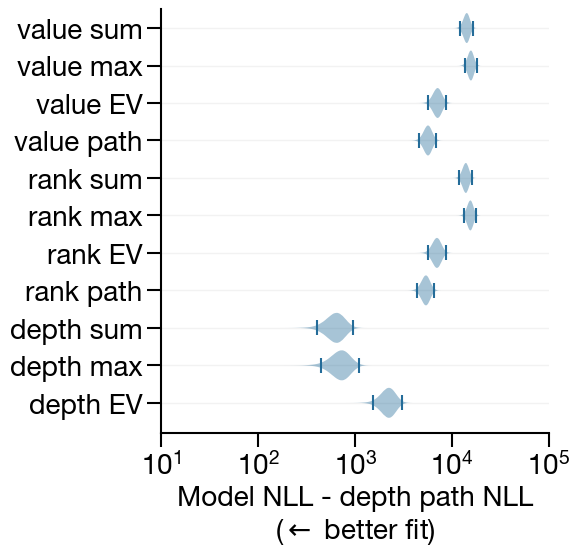

In [6]:
a.plot_model_comparison(format = "violin")
plt.xscale("log")
plt.xlim(10, 10**5)
plt.gca().set_xticks((10 ** np.arange(1, 6)).tolist())

### Figure 5: Model Checking Plots

100%|██████████| 100/100 [00:01<00:00, 94.40it/s]


([<matplotlib.axis.XTick at 0x31d4366d0>,
 [Text(-6, 0, '−6'),
  Text(-3, 0, '−3'),
  Text(0, 0, '0'),
  Text(3, 0, '3'),
  Text(6, 0, '6')])

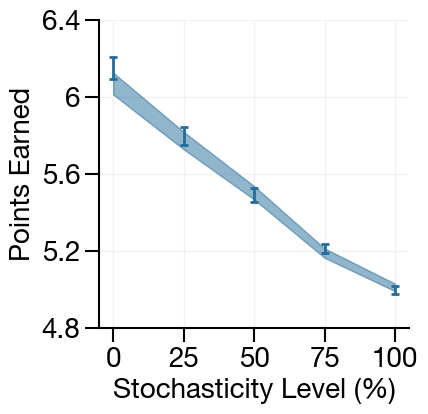

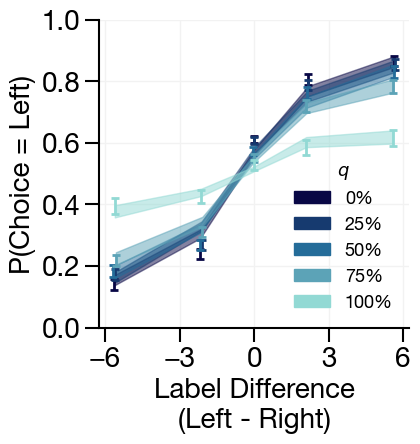

In [7]:
df_reward, df_reward_sim = a.plot_checking_condition(trialwise_rewards, show_model = True)
plt.ylabel("Points Earned"); plt.xlabel("Stochasticity Level (%)"); plt.xticks(np.array(get_conditions(type_)) * 100);
plt.yticks([4.8, 5.2, 5.6, 6, 6.4])
plt.gca().set_yticklabels([strsimplify(y) for y in plt.gca().get_yticks()]);
plt.gca().set_xticklabels([strsimplify(x) for x in plt.gca().get_xticks()]);

df_value, df_value_sim = a.plot_checking(trialwise_greedydiff, trialwise_chooseleft, n_bins = 5, show_model = True)
plt.xlabel("Label Difference\n(Left - Right)"); plt.ylabel("P(Choice = Left)")
plt.ylim([0, 1])
plt.xticks([-6, -3, 0, 3, 6])

### Figure 6: Depth vs Stochasticity Plot

/var/folders/zg/ybzt9k3n0w76zjh5b5rgss1w0000gp/T/ipykernel_19965/3805657828.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([strsimplify(y) for y in plt.gca().get_yticks()]);


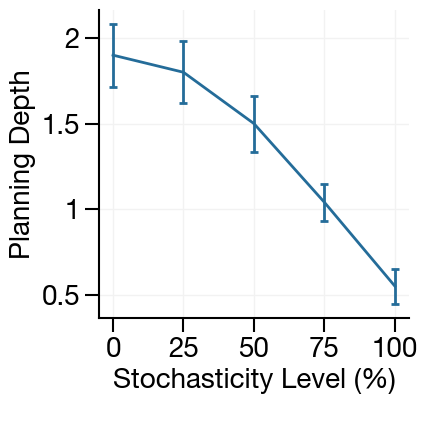

In [8]:
df_depth = a.plot_stochasticity_vs_depth()
plt.gca().set_yticklabels([strsimplify(y) for y in plt.gca().get_yticks()]);
plt.gca().set_xticklabels([strsimplify(x) for x in plt.gca().get_xticks()]);

## Mixed Models Analysis

In [9]:
print(f"Stochasticity vs Reaction Time Regression Analysis\n")
print(lmm(df_rt))

print(f"Stochasticity vs Reward Regression Analysis LMM\n")
print(lmm(df_reward))

print(f"Greedy Value vs Choice LeftRegression Analysis GLMM\n")
print(glmm(df_value))

print(f"-----------------------------------\n")

print(f"[Model] Stochasticity vs Depth Regression Analysis\n")
print(lmm(df_depth))

print(f"[Model] Stochasticity vs Reward Regression Analysis LMM\n")
print(lmm(df_reward_sim))

print(f"[Model] Greedy Value vs Choice LeftRegression Analysis GLMM\n")
print(glmm(df_value_sim))

Stochasticity vs Reaction Time Regression Analysis



/Users/jordanlei/Github/treasure_hunt/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: y~conditions+(1|participants)

Family: gaussian	 Inference: parametric

Number of observations: 15000	 Groups: {'participants': 100.0}

Log-likelihood: -16835.497 	 AIC: 33678.995

Random effects:

                     Name    Var    Std
participants  (Intercept)  0.450  0.671
Residual                   0.535  0.731

No random effect correlations specified

Fixed effects:

\beta = -0.63, t_14899.00 = -37.12, p < 10^{-10}

Stochasticity vs Reward Regression Analysis LMM



/Users/jordanlei/Github/treasure_hunt/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: y~conditions+(1|participants)

Family: gaussian	 Inference: parametric

Number of observations: 105000	 Groups: {'participants': 100.0}

Log-likelihood: -245280.307 	 AIC: 490568.614

Random effects:

                     Name    Var    Std
participants  (Intercept)  0.076  0.275
Residual                   6.244  2.499

No random effect correlations specified

Fixed effects:

\beta = -1.16, t_104899.00 = -53.03, p < 10^{-10}

Greedy Value vs Choice LeftRegression Analysis GLMM

Fitting generalized linear model using glmer (family binomial) with Wald confidence intervals...



/Users/jordanlei/Github/treasure_hunt/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~x*conditions+(1|participants)

Family: binomial	 Inference: parametric

Number of observations: 105000	 Groups: {'participants': 100.0}

Log-likelihood: -60015.253 	 AIC: 120040.507

Random effects:

                     Name    Var    Std
participants  (Intercept)  0.041  0.203

No random effect correlations specified

Fixed effects:



/Users/jordanlei/Github/treasure_hunt/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/jordanlei/Github/treasure_hunt/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~x+conditions+(1|participants)

Family: binomial	 Inference: parametric

Number of observations: 105000	 Groups: {'participants': 100.0}

Log-likelihood: -61425.001 	 AIC: 122858.002

Random effects:

                     Name   Var    Std
participants  (Intercept)  0.04  0.199

No random effect correlations specified

Fixed effects:

\beta = -0.339, \chi^2(1) = 2819.50, p < 10^{-10}

-----------------------------------

[Model] Stochasticity vs Depth Regression Analysis

Linear mixed model fit by REML [’lmerMod’]
Formula: y~conditions+(1|participants)

Family: gaussian	 Inference: parametric

Number of observations: 500	 Groups: {'participants': 100.0}

Log-likelihood: -902.736 	 AIC: 1813.471

Random effects:

                     Name    Var    Std
participants  (Intercept)  0.497  0.705
Residual                   1.813  1.347

No random effect correlations specified

Fixed effects:

\beta = -1.38, t_399.00 = -8.13,

/Users/jordanlei/Github/treasure_hunt/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: y~conditions+(1|participants)

Family: gaussian	 Inference: parametric

Number of observations: 105000	 Groups: {'participants': 100.0}

Log-likelihood: -245499.224 	 AIC: 491006.447

Random effects:

                     Name    Var    Std
participants  (Intercept)  0.069  0.263
Residual                   6.270  2.504

No random effect correlations specified

Fixed effects:

\beta = -1.07, t_104899.00 = -48.97, p < 10^{-10}

[Model] Greedy Value vs Choice LeftRegression Analysis GLMM

Fitting generalized linear model using glmer (family binomial) with Wald confidence intervals...



R[write to console]: boundary (singular) fit: see help('isSingular')

/Users/jordanlei/Github/treasure_hunt/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~x*conditions+(1|participants)

Family: binomial	 Inference: parametric

Number of observations: 105000	 Groups: {'participants': 100.0}

Log-likelihood: -61322.500 	 AIC: 122655.000

Random effects:

                     Name  Var  Std
participants  (Intercept)  0.0  0.0

No random effect correlations specified

Fixed effects:

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~x+conditions+(1|participants)

Family: binomial	 Inference: parametric

Number of observations: 105000	 Groups: {'participants': 100.0}

Log-likelihood: -62410.997 	 AIC: 124829.994

Random effects:

                     Name  Var    Std
participants  (Intercept)  0.0  0.005

No random effect correlations specified

Fixed effects:

\beta = -0.29, \chi^2(1) = 2176.99, p < 10^{-10}



/Users/jordanlei/Github/treasure_hunt/.venv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
